In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import yfinance as yf

In [5]:
_empty_series = pd.Series(dtype=float)


In [6]:
sp500 = yf.Ticker("^GSPC")

In [7]:
sp500 = sp500.history(period="max")

In [8]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,0.0,0.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,0.0,0.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,0.0,0.0


In [9]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-16 00:00:00-05:00', '2024-02-20 00:00:00-05:00',
               '2024-02-21 00:00:00-05:00', '2024-02-22 00:00:00-05:00',
               '2024-02-23 00:00:00-05:00', '2024-02-26 00:00:00-05:00',
               '2024-02-27 00:00:00-05:00', '2024-02-28 00:00:00-05:00',
               '2024-02-29 00:00:00-05:00', '2024-03-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24157, freq=None)

<Axes: xlabel='Date'>

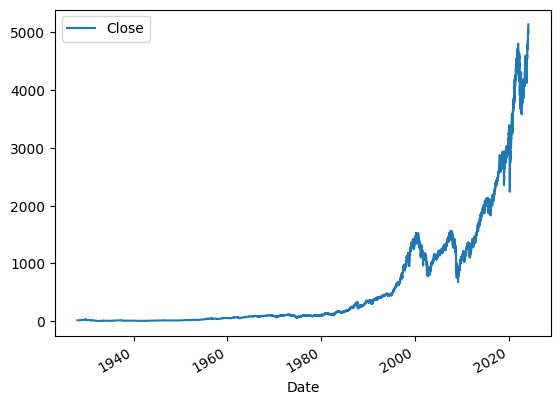

In [10]:
sp500.plot.line(y="Close" , use_index = True)

In [11]:
del sp500["Dividends"]
del sp500["Stock Splits"]


In [12]:
 sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020


In [14]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


In [16]:
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close" , "Volume" , "Open" , "High" , "Low"]
model.fit(train[predictors] , train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [19]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
import pandas as pd
preds = pd.Series(preds,index = test.index)
precision_score(test["Target"],preds)

0.5172413793103449

In [20]:
combined = pd.concat([test["Target"],preds] , axis=1)

<Axes: xlabel='Date'>

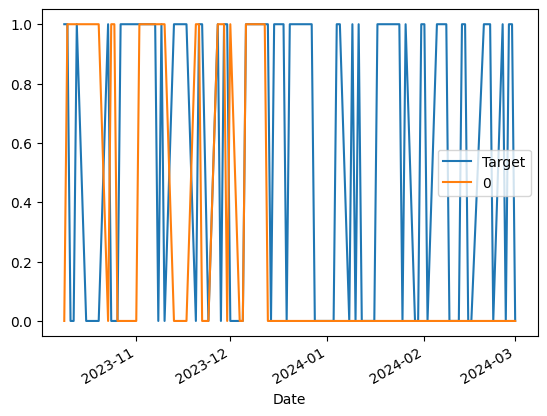

In [21]:
combined.plot()

In [38]:
from operator import index
def predict(train , test , predictors , model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index = test.index , name = "Predictions")
    combined = pd.concat([test["Target"],preds] , axis=1)
    return combined




In [23]:
def backtest(data , model , predictors , start = 2500 , step = 250):
    all_predictions = []


    for i in range(start , data.shape[0] , step):
          train = data.iloc[:i].copy()
          test = data.iloc[i:(i+step)].copy()
          predictions = predict(train, test, predictors,model)
          all_predictions.append(predictions)
          return pd.concat( all_predictions)

In [24]:
predictions = backtest(sp500, model, predictors)

In [25]:
predictions["Predictions"].value_counts()

0    237
1     13
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions["Target"] , predictions["Predictions"])

0.46153846153846156

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.516
1    0.484
Name: Target, dtype: float64

In [31]:
horizons = [2,5,60,200,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]


In [34]:
sp500 = sp500.dropna()

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_200,Trend_200,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.021451,101.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.018618,100.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.021746,101.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.028220,102.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.026926,101.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0,1.000174,2.0,1.012144,3.0,1.059453,38.0,1.129932,114.0,1.262368,532.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.124467,114.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.125212,114.0,1.258437,533.0


In [36]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [39]:
def predict(train , test , predictors , model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6 ] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds,index = test.index , name = "Predictions")
    combined = pd.concat([test["Target"],preds] , axis=1)
    return combined


In [44]:
predictions = backtest(sp500, model, new_predictors)

In [48]:
predictions["Predictions"].value_counts()

0.0    221
1.0     29
Name: Predictions, dtype: int64

In [49]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5517241379310345

In [50]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_200,Trend_200,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.021451,101.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.018618,100.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.021746,101.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.028220,102.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.026926,101.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0,1.000174,2.0,1.012144,3.0,1.059453,38.0,1.129932,114.0,1.262368,532.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.124467,114.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.125212,114.0,1.258437,533.0
